Importing the Libraries

In [ ]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Read data file
data = pd.read_csv("/content/data.csv", header=0)
seed = 5
numpy.random.seed(seed)

<H1>EDA<h1>


In [ ]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)


Here 'M','B' represents malignant and benign.both are two type of tumers.Benign tumors tend to grow slowly and do not spread. Malignant tumors can grow rapidly, invade and destroy nearby normal tissues, and spread throughout the body.benign is noncancerous and malignant is cancerous

machine learning models can not deal with categorical data set as string.so we will relplce 'M'(cancerous) as 1 and 'B' as '0'.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


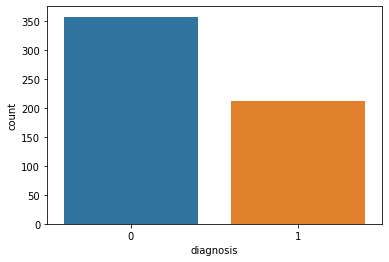

In [ ]:
sns.countplot(x='diagnosis',data=dataset)

from this graph we can see that there is a more number of bengin(noncancers) tumor detected than malignant

<h2>Correlation matrix (heatmap style)

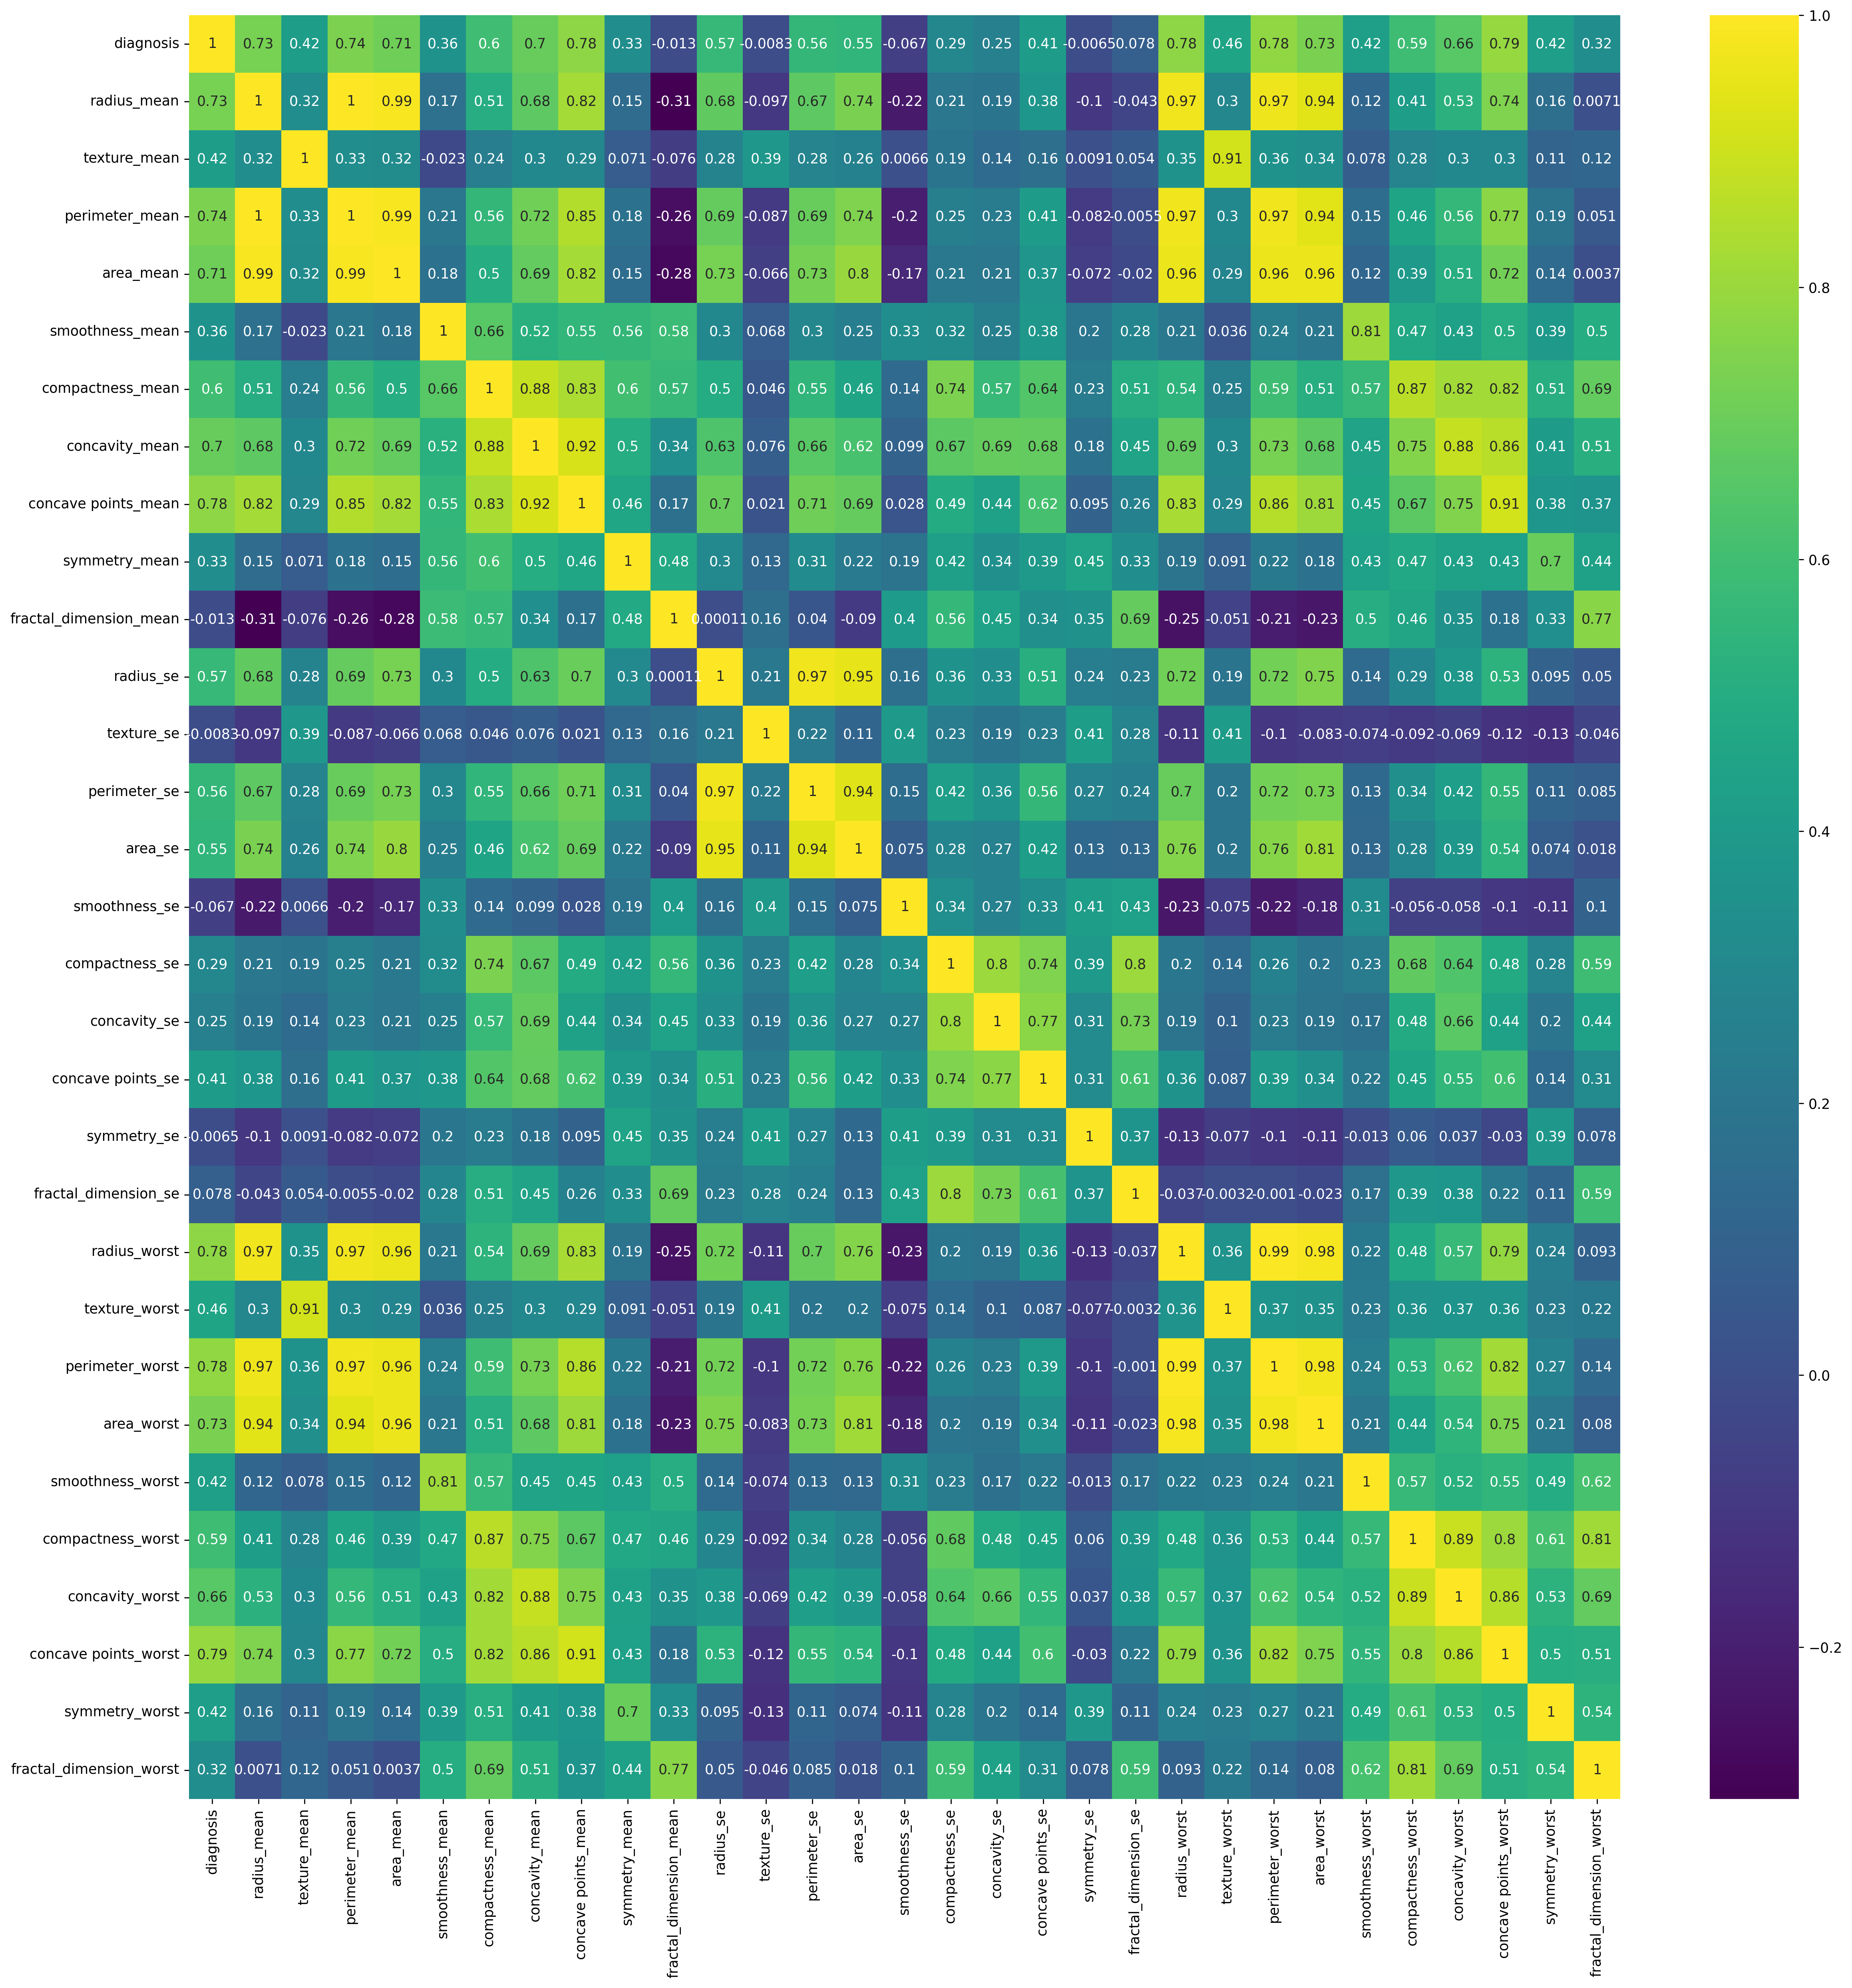

In [ ]:
#correlation matrix
plt.figure(figsize=(20,20),dpi=250,tight_layout=True)
sns.heatmap(dataset.corr(),annot=True,cmap="viridis")

'concave points_worst', 'perimeter_worst' and 'radius_worst' are strongly correlated with 'diagnosis '


In [ ]:
#cancerous tumor  correlation
cancerous = dataset.corr()['diagnosis'].sort_values(ascending=False).round(2)

In [ ]:
cancerous

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
area_worst                 0.73
radius_mean                0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothness_se             -0.07
Name: di

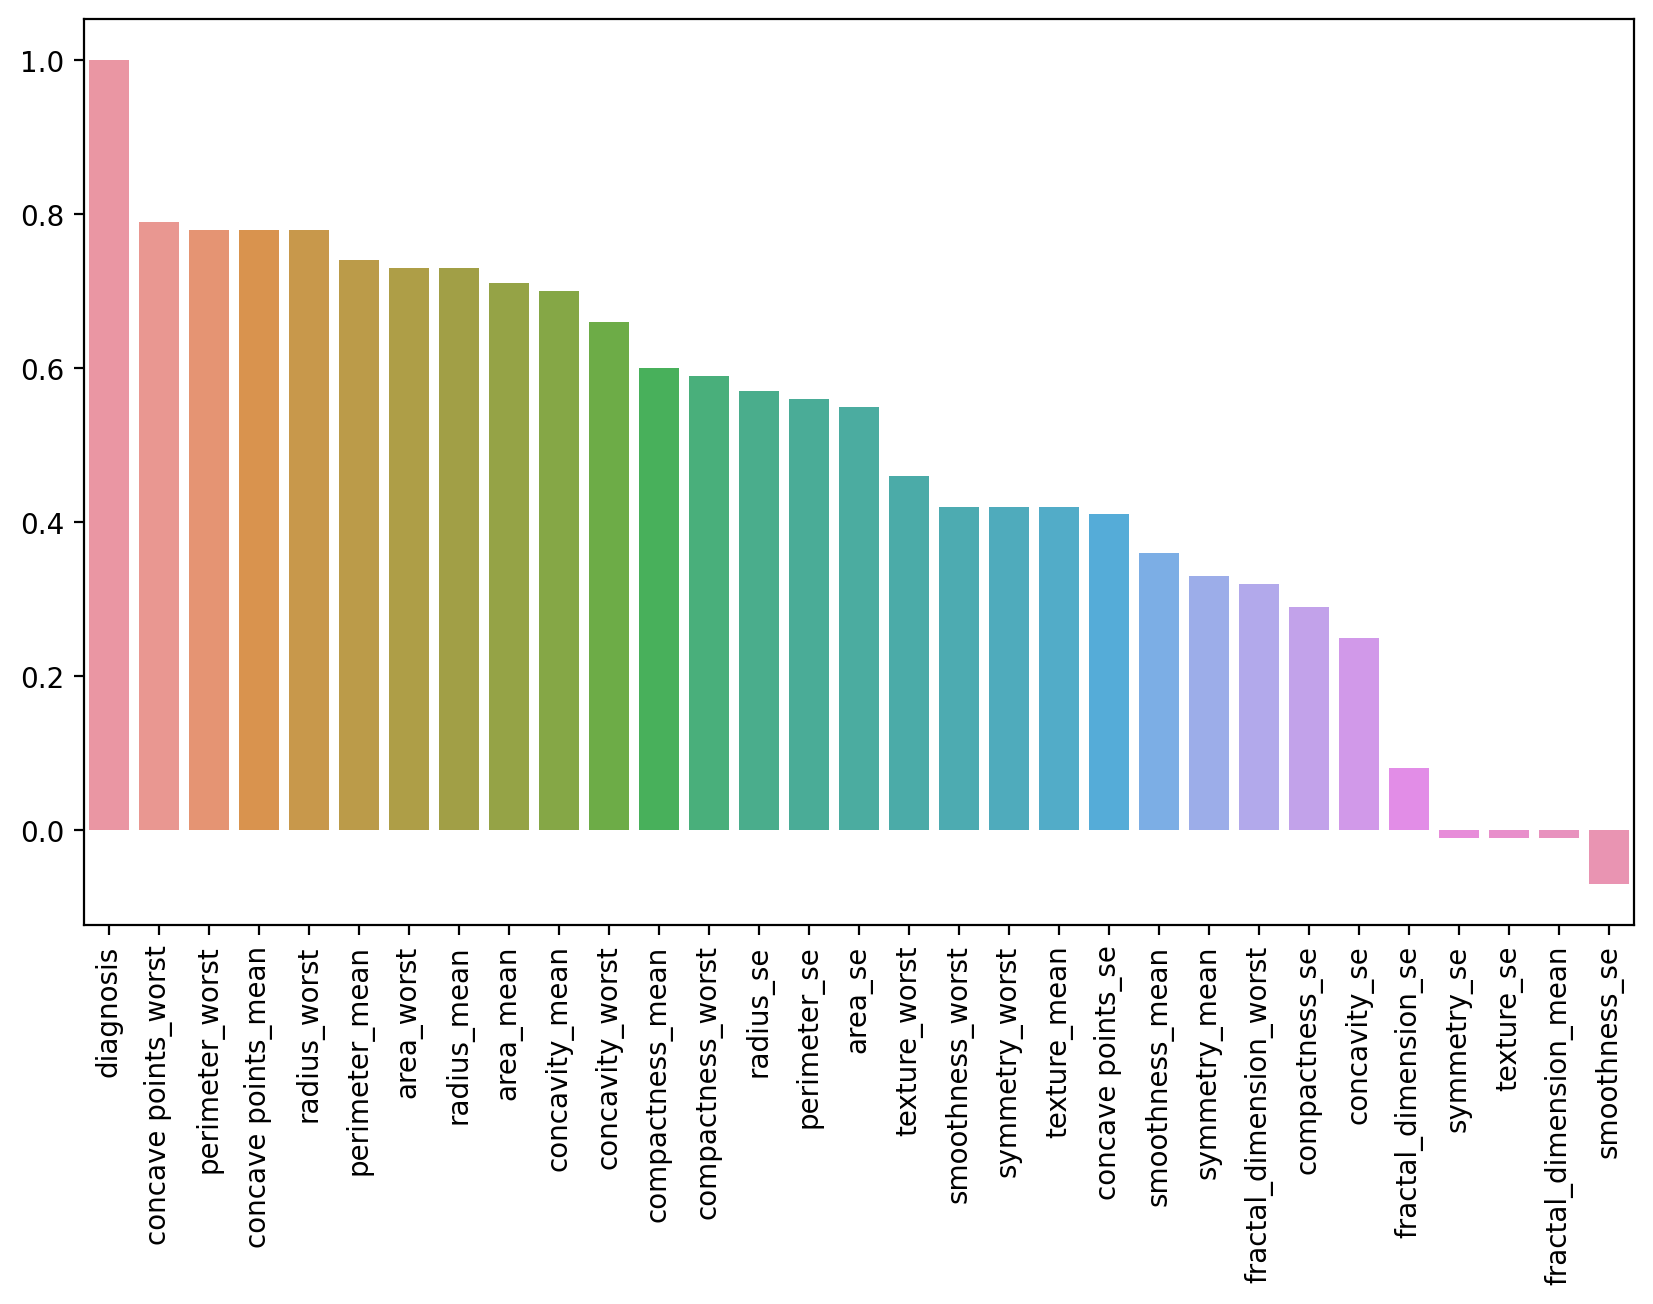

In [ ]:
#cancerous tumor correlation bar plot 
plt.figure(figsize=(10,6),dpi=200)
ax = sns.barplot(x=cancerous.index,y=cancerous.values)
plt.xticks(rotation=90)
plt.show()